### Linear Regression Using Pseudo Inverse

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = np.random.rand(100)
y = 13*X + 3 + 1*np.random.randn(100)

In [3]:
X_stack = np.vstack((X,np.ones(np.shape(X)))).T
XTX_inv = np.linalg.inv(np.dot(X_stack.T,X_stack))
XtY = np.dot(X_stack.T,y)
W = np.dot(XTX_inv, XtY)
y_pred = W[0]*X + W[1]

### Linear Regression Using Gradient Descent

$\textbf{y}_{i} = \textbf{w}^{T}\textbf{x}_{i}+{b}$ is how a Linear Regression is written. 

In [4]:
def gradDescent(X,y,lr,epochs):
    w = np.array([0.1]*X.shape[1])
    b = 0.1
    N = X.shape[0]
    for i in range(epochs):
        _sumW = 0
        _sumB = 0
        for j in range(N):
            _sumW += (-y[j]+(w.dot(X[j])+b))*(X[j].T)
            _sumB += (-y[j]+(w.dot(X[j])+b))
        _sumW = _sumW*2/N
        _sumB = _sumB*2/N
        w -= lr*_sumW
        b -= lr*_sumB
    return w,b

In [5]:
X = X.reshape(100,1)

In [6]:
w, b = gradDescent(X ,y,0.1,1000)

In [7]:
y_pred2 = np.matmul(X,w)+b

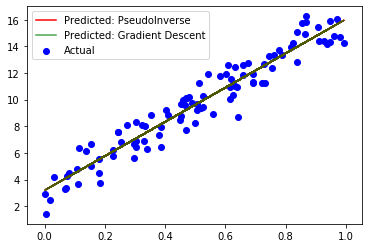

In [8]:
plt.scatter(X, y, color = 'blue', label='Actual')
plt.plot(X,y_pred, color = 'red', label='Predicted: PseudoInverse')
plt.plot(X,y_pred2, color = 'green', label = 'Predicted: Gradient Descent', alpha=0.7)
plt.legend()
plt.show()

#### Analysing more than 1 feature (m)

In [9]:
X = np.random.rand(100,2)
y = 13*X[:,0] +15*X[:,1]+ 3 + 1*np.random.randn(100)

In [10]:
w, b = gradDescent(X,y,0.1,1000)

In [11]:
y_pred2 = np.matmul(X,w)+b

In [12]:
def mse(y, y_):
    return np.sqrt((1/y.shape[0])*np.linalg.norm(y-y_)**2)

In [13]:
mse(y_pred2, y)

0.9416284073893111

In [14]:
def r2(y,y_):
    y_mean = np.mean(y)
    s1 = np.linalg.norm((y-y_mean))**2
    s2 = np.linalg.norm((y-y_))**2
    r = 1 - s2/s1
    return r
    

In [15]:
r2(y,y_pred2)

0.9774373614650574

### Logistic Regression

In [16]:
def gradDescentLogReg(X,y,lr,epochs):
    N = X.shape[0]
    m = X.shape[1]
    w = np.array([0.1]*m)
    for i in range(epochs):
        _sumW = 0
        for j in range(N):
            power = np.exp(w.dot(X[j]))
            y_=power/(1+power)
            _sumW += (-y[j]+y_)*(X[j].T)
        w -= lr*_sumW
    return w

#### Data is directly dependent on the first feature and thus logistic regression should perform very well.

In [17]:
X = np.random.uniform(-3, 3, (100, 2))
y = np.array([0]*100)
for i in range(100):
    if X[i][0] > 0:
        y[i] = 1
    else:
        y[i] = 0
X_ = X.T
X_stacked = np.vstack((np.ones(X.shape[0]), X_)).T

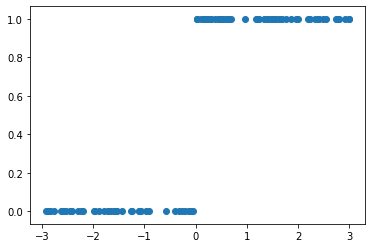

In [18]:
plt.scatter(X[:,0],y)

In [19]:
def predict(X,y,lr,epochs):
    w = gradDescentLogReg(X_stacked,y,lr,epochs)
    power = np.matmul(X_stacked,w)
    
    def f(x):
        return np.exp(x)/(1+np.exp(x))
    sigmoid = np.vectorize(f)
    
    result = sigmoid(power)
    
    def g(x):
        if x>0.5:
            return 1
        else:
            return 0
    
    prob = np.vectorize(g)
    
    y_pred = prob(result)
    
    def accuracy(y, y_):
        correct = 0
        total = len(y)
        for i in range(total):
            if y[i] == y_[i]:
                correct += 1
        return correct/total
    
    acc = accuracy(y,y_pred)
    
    return y_pred, acc
    

In [20]:
y_pred, acc = predict(X_stacked,y,0.001,1000)

In [21]:
print(acc)

0.98


#### Conclusion
- As expected the accuracy is around 95-100%. This shows how effective logistic regression is on linearly separable data.
- Both Linear and Logistic Regression have same derivative of loss function, that is $\frac{1}{N}(\hat{y}-y)X^{T}$, though Linear Regression has a extra factor of 1/2 .

### Logistic Regression on non-linear data
- We make $y = H(x1 \cdot x2)$, $H$ is the heaviside function.

In [22]:
X = np.random.uniform(-3, 3, (100, 2))
y = np.array([0]*100)
for i in range(100):
    if X[i][0]*X[i][1] > 0:
        y[i] = 1
    else:
        y[i] = 0
X_ = X.T
X_stacked = np.vstack((np.ones(X.shape[0]), X_)).T

In [23]:
y_pred, acc = predict(X_stacked, y, 0.001, 1000)

In [24]:
print(acc)

0.67


#### Conclusion
- Logistic Regression doesn't work as well when the data is not linearly separable. This result is showing that a different model is required